# Pulling Force Predictive Model

This code imports the empirical straight-line pulling-force data, adds synthetic data to increase the number of samples, then regularises the data features. making the model easier to learn. 

## Import Pulling Force Data


In [70]:
import pandas as pd
import numpy as np

pull_data = pd.read_csv('/home/ur10pc/Desktop/robot_data/pipebending_results2.csv', delimiter=',')
pull_data = pd.DataFrame(pull_data)
display(pull_data.head())

,angle,hole,hose,force
0,0,20,16,1.449
1,10,20,16,1.279
2,20,20,16,1.292
3,30,20,16,3.071
4,40,20,16,7.953


## Data Shuffling
Shuffling the data is important because it removes correlations in the data series. Correlations occur in time series data because each data point is very similar to the last few data points. When feeding your data to a learning algorithm, if you do not shuffle your data, the model will become bias to the last batch of data which is highly correlated and forget earlier parameters set using earlier data.  

In [71]:
pull_shuffle = pull_data.iloc[np.random.permutation(len(pull_data))]
pullshuffle = pull_shuffle.reset_index(drop=True)
pullshuffle.head()
print(np.shape(pullshuffle))

(59, 4)


## PolynomialFeatures
When there are known nonlinearities hiding in the data which have an effect on the output, adding polynomial features can help the model learn these nonlinearities which give more accurate results. 

## Code used to generate synthetic data

In [72]:
np.random.seed(0)

data =  pull_data #pullshuffle
mu, sigma = 0, 1 
noise = np.random.normal(mu, sigma, [59,1])
mu, sigma = 0, 2
noise2 = np.random.normal(mu, sigma, [59,1])
mu, sigma = 0, 3
noise3 = np.random.normal(mu, sigma, [59,1])
display(data.head())
noisy_data = data + noise
noisy_data2 = data +noise2
noisy_data3 = data + noise3
display(noisy_data.head())
display(noisy_data2.head())
combined_data = pd.concat([data, noisy_data, noisy_data2, noisy_data3], axis=0)
combined_data = combined_data.iloc[np.random.permutation(len(combined_data))]
combined_data = combined_data.reset_index(drop=True)
display(combined_data.head(50))
print(np.shape(combined_data))
print(np.shape(noisy_data))
print(np.shape(noisy_data2))


,angle,hole,hose,force
0,0,20,16,1.449
1,10,20,16,1.279
2,20,20,16,1.292
3,30,20,16,3.071
4,40,20,16,7.953


,angle,hole,hose,force
0,1.764052,21.764052,17.764052,3.213052
1,10.400157,20.400157,16.400157,1.679157
2,20.978738,20.978738,16.978738,2.270738
3,32.240893,22.240893,18.240893,5.311893
4,41.867558,21.867558,17.867558,9.820558


,angle,hole,hose,force
0,-0.725482,19.274518,15.274518,0.723518
1,8.655079,18.655079,14.655079,-0.065921
2,19.280894,19.280894,15.280894,0.572894
3,28.373707,18.373707,14.373707,1.444707
4,36.547435,16.547435,12.547435,4.500435


,angle,hole,hose,force
0,10.000000,18.000000,16.000000,9.594000
1,28.630380,16.630380,14.630380,29.167380
2,-3.260397,15.739603,12.739603,1.015603
3,71.469359,21.469359,13.469359,3.361359
4,10.000000,17.000000,16.000000,12.471000
5,41.458181,20.458181,17.458181,22.665181
6,76.557594,15.557594,8.557594,-0.586406
7,20.500020,20.500020,12.500020,1.458020
8,-0.895467,16.104533,11.104533,1.216533
9,30.000000,20.000000,12.000000,0.943000


(236, 4)
(59, 4)
(59, 4)


## Normalisation 
This snippet pre-processes the data by scaling the features. This has the effect of reducing bias in the input features by making them all of the same oder of magnitude which improves the model.

In [73]:
from sklearn.preprocessing import StandardScaler
data = combined_data.drop('force', axis=1)
display(combined_data.head(), data.head())
scaler = StandardScaler()
scaler.fit(data)

#print(scaler.mean_)

data2 = scaler.transform(data)
data2 = pd.DataFrame(data2)
data2.columns= ['angle', 'hole', 'hose']

#print(scaler.transform([[2, 2]]))
data2 = pd.DataFrame(data2)
display(data2.head())

,angle,hole,hose,force
0,10.000000,18.000000,16.000000,9.594000
1,28.630380,16.630380,14.630380,29.167380
2,-3.260397,15.739603,12.739603,1.015603
3,71.469359,21.469359,13.469359,3.361359
4,10.000000,17.000000,16.000000,12.471000


,angle,hole,hose
0,10.000000,18.000000,16.000000
1,28.630380,16.630380,14.630380
2,-3.260397,15.739603,12.739603
3,71.469359,21.469359,13.469359
4,10.000000,17.000000,16.000000


,angle,hole,hose
0,-0.991043,-0.338843,0.915508
1,-0.249286,-0.966802,0.384793
2,-1.518998,-1.375216,-0.347866
3,1.456322,1.251829,-0.065093
4,-0.991043,-0.797334,0.915508


## Saving combined_data with which to normalise new, single observations.

## Concat Normalised Feature Data with Force Target
This is because the model is expecting the full data set, more precisely, the 'train-test-split' needs the full dataset. I must find out how to do this part manually.  

## Save Data.to_csv

## TPOT Generator
TPOT is an AutoML framework based on the Sci-Kit learn API. It uses genetic algorithms to find an "almost" optimal learning model given the data. After a few experiments, TPOT has proved to be very useful. 

## Pickle TPOT

## Restart TPOT From Pickle

## An Ensemble of ExtraTreesReg and DecisionTreeReg

This code has been auto generated by TPOT. 
The data used in determining this solution was concatenated with synthetic data and regularised. The added effect of regularisation is a reduction in the CV score from -8.3 to -4.2

In [74]:
display()

## Calculate Error
What is the error between the empirical and model predicted results? 
This code also returns the average error over the whole test set.

## An Ensemble of AdaBoostReg, ExtraTreesReg and GradientBoostingReg

This script was auto generated by TPOT and suggests an ensemble of stacked regressors is the most optimal solution.
This solution is based on pull data that has been concatenated with synthetic data but not regularised. 

In [75]:
from sklearn.decomposition import FastICA, PCA
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive


tpot_data = combined_data
features = tpot_data.drop('force', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['force'], random_state=42)


# Average CV score on the training set was: -1.5026407356655251
exported_pipeline = make_pipeline(
    PCA(iterated_power=9, svd_solver="randomized"),
    FastICA(tol=0.2), #0.2
    
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, 
                                                          learning_rate=1.0, #1.0
                                                          loss="ls", 
                                                          max_depth=5, 
                                                          max_features=0.6000000000000001, 
                                                          min_samples_leaf=10, 
                                                          min_samples_split=5, 
                                                          n_estimators=100, 
                                                          subsample=0.05)),
    
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=1.0, #1.0
                                                  loss="square", 
                                                  n_estimators=100)),
    FastICA(tol=0.4),
    
    ExtraTreesRegressor(bootstrap=False, 
                        max_features=1.0, 
                        min_samples_leaf=1, 
                        min_samples_split=2, 
                        n_estimators=100)
    
)

# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
print(np.shape(testing_features))



(59, 3)


## Make a new prediction

In [76]:
#print(tpot_data[-1:])
print('################################################')
sample = [[4.8, 20, 16]]#, columns=['angle', 'hole', 'hose', 'force']) #features[-1:]
#features = sample.drop('force', axis=1)
#training_features, testing_features, training_target, testing_target = \
           # train_test_split(features, sample['force'], train_size=None, test_size=0, random_state=42, shuffle=False)
print(np.shape(sample))
print(sample)
result = exported_pipeline.predict(sample)
result = pd.DataFrame(result)
print('################################################')
display(result)

#print(np.shape(testing_features))
#display(testing_features.head())
display(pull_data.head())
#60-70-45, 80-42, 90-41,100-38,  

################################################
(1, 3)
[[4.8, 20, 16]]
################################################


,0
0,1.826966


,angle,hole,hose,force
0,0,20,16,1.449
1,10,20,16,1.279
2,20,20,16,1.292
3,30,20,16,3.071
4,40,20,16,7.953


## Pickle Model

In [77]:
import pickle
with open('/home/ur10pc/Desktop/robot_data/pickle/simple_model.pkl','wb') as f:
    pickle.dump(exported_pipeline, f, -1)#protocol=2)


## load Pickle Model

## Results From Ensemble of AdaBoostReg, ExtraTreesReg and GradientBoostingReg

In [78]:
results = pd.DataFrame(results)
results.columns = ['Prediction']
results_data = pd.concat([ testing_features.reset_index(drop=True), 
                          testing_target.reset_index(drop=True), 
                          results.reset_index(drop=True)], axis=1)

results_data['error'] = results_data['force']-results_data['Prediction']
abs_error = np.abs(results_data['error'])
error_sum = abs_error.sum()
average_error = error_sum/len(results_data)

print(' Average error is: ', average_error, 'N')

display(results_data.head()) # Last average error value was 0.5766 #5.0 # 0.9 #1.015 #0.986 ???? different every time??
print(np.shape(results_data))

#0.9
#1.0
#9.2
#1.7
#2.7
#4.6
#2.3
#1.8

#clear catch
#1.2
#0.596
#1.245
#1.659
#2.765
#0.656

 Average error is:  1.8013849061269882 N


,angle,hole,hose,force,Prediction,error
0,0.000000,19.000000,12.000000,1.256000,1.050076,0.205924
1,41.413146,20.413146,13.413146,2.662146,2.703552,-0.041405
2,9.375104,16.375104,15.375104,11.846104,11.945737,-0.099634
3,30.000000,20.000000,12.000000,0.943000,1.383302,-0.440302
4,30.000000,19.000000,12.000000,1.214000,1.335801,-0.121801


(59, 6)


## An Ensemble of LassoLarsCV, SGDReg, and AdaBoostReg 

## Results From An Ensemble of LassoLarsCV, SGDReg, and AdaBoostReg 

## Plot Results Matplotlib

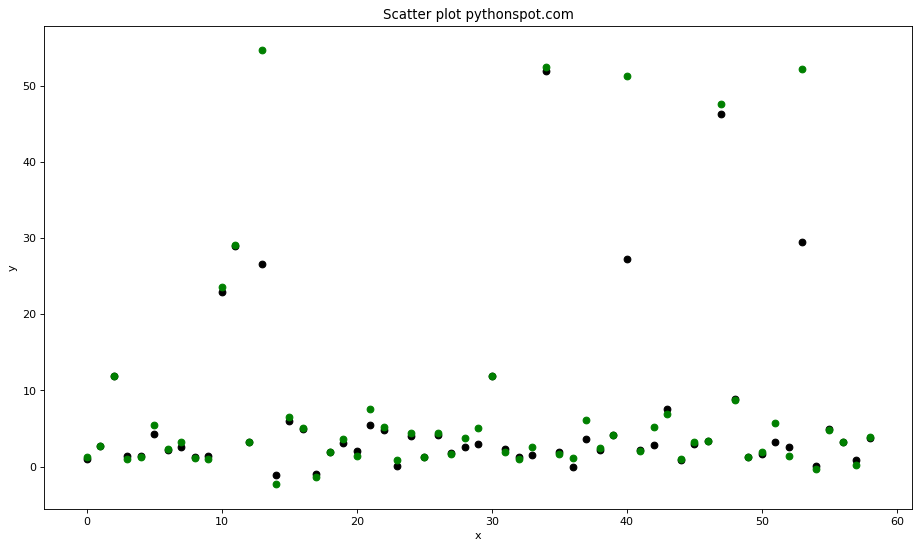

In [79]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')


x = results_data.index
y = results_data['Prediction'] #Black
z = results_data['force'] #Green 

plt.scatter(x, y, color='k')
plt.scatter(x, z, color='g')
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 